# Breast Cancer Classification Using SVM and Forward Feature Selection Method 

In [52]:
#importing the required modules 

import pandas as pd # to read the cancer data

import matplotlib.pyplot as plt # plotting the graph

import seaborn as sns #To plot heatmap

from sklearn.model_selection import train_test_split #to split the data into train and test dataset

from sklearn.svm import SVC # model we are using for classification in this project 

from mlxtend.feature_selection import SequentialFeatureSelector as sfs # this module help to perform feature selection

from sklearn.metrics import accuracy_score # to find the accuracy of our model 

from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.linear_model import LinearRegression


In [60]:
#reading the data set 
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [61]:
x= data.iloc[:, 2:-1]  # selecting all the column except id,diagnosis and the last unnamed 
y = data.iloc[:, 1]# selecting diagnosis as target variable 
print("Number of columns before performing forward feature selection",x.shape[1])
print (x.shape)

Number of columns before performing forward feature selection 30
(569, 30)


In [62]:
y = [1 if i=='M' else 0 for i in y] # converting the character data into numeric 
classifier = SVC(gamma='auto')

In [63]:
# performing the feature selection
selection=sfs(classifier ,k_features=23,forward =True,verbose=2,scoring='neg_mean_squared_error')
selection=selection.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.0s finished

[2020-05-12 14:24:17] Features: 1/23 -- score: -0.08415544440169295[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    1.8s finished

[2020-05-12 14:24:19] Features: 2/23 -- score: -0.07015005771450558[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    2.3s finished

[2020-05-12 14:24:22] Features: 3/23 -- score: -0.056144671027318196[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]:

In [64]:
selected_feature=list(selection.k_feature_names_)
print ("Selected feature after performing forward feature selection ")
print (selected_feature)

Selected feature after performing forward feature selection 
['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'perimeter_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [65]:
new_x=data[selected_feature] # assaigning the selected data 
print ("New number of columns is ",new_x.shape[1])

New number of columns is  23


Number of data correctly classified as benign  104

Number of benign data wrongly classified as malignant  4

Number of data correctly classified as malignant  56

Number of malignant data wrongly classified as benign  4

The accuracy of our model is 93.57% 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       108
           1       0.93      0.89      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



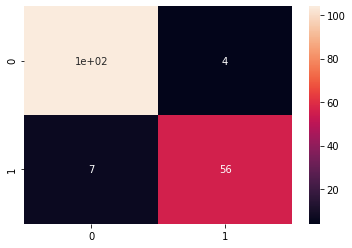

In [76]:
#splitting of data into train and test . 30% data is considered for testing 
X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size=0.3, random_state=0)

#normilization of data 
min_train = X_train.min()
range_train = (X_train-min_train).max() # find biggest difference between min value and any point of dataset
X_train= (X_train - min_train)/range_train

min_test = X_test.min()
range_test = (X_test-min_test).max()
X_test= (X_test - min_test)/range_test
# training the data into our model (SVC)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)# predicting the output for the test dataset
cm = confusion_matrix(y_test, y_predict) # displaying the result in confusion matrix 
sns.heatmap(cm, annot= True)

print ("Number of data correctly classified as benign ",cm[0][0])
print ("\nNumber of benign data wrongly classified as malignant ",cm[0][1])
print ("\nNumber of data correctly classified as malignant ",cm[1][1])
print ("\nNumber of malignant data wrongly classified as benign ",cm[0][1])

accuracy =accuracy_score(y_test, y_predict)*100

print ("\nThe accuracy of our model is {:.2f}% \n".format(accuracy))
print(classification_report(y_test, y_predict)) #displaying the confusion matrix